### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Χαρίδημος Παπαδάκης

Α.Μ.: 03120022

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [128]:
import numpy as np
image_data = np.load('/Users/harrypapadakis/Desktop/indian_pines_corrected.npy')

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [129]:
annotations = np.load('/Users/harrypapadakis/Desktop/indian_pines_gt.npy')

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [130]:
#2a
height, width, num_channels = image_data.shape
print(f"Height: {height}, Width: {width}, Number of Hyperspectral Channels: {num_channels}")


Height: 145, Width: 145, Number of Hyperspectral Channels: 200


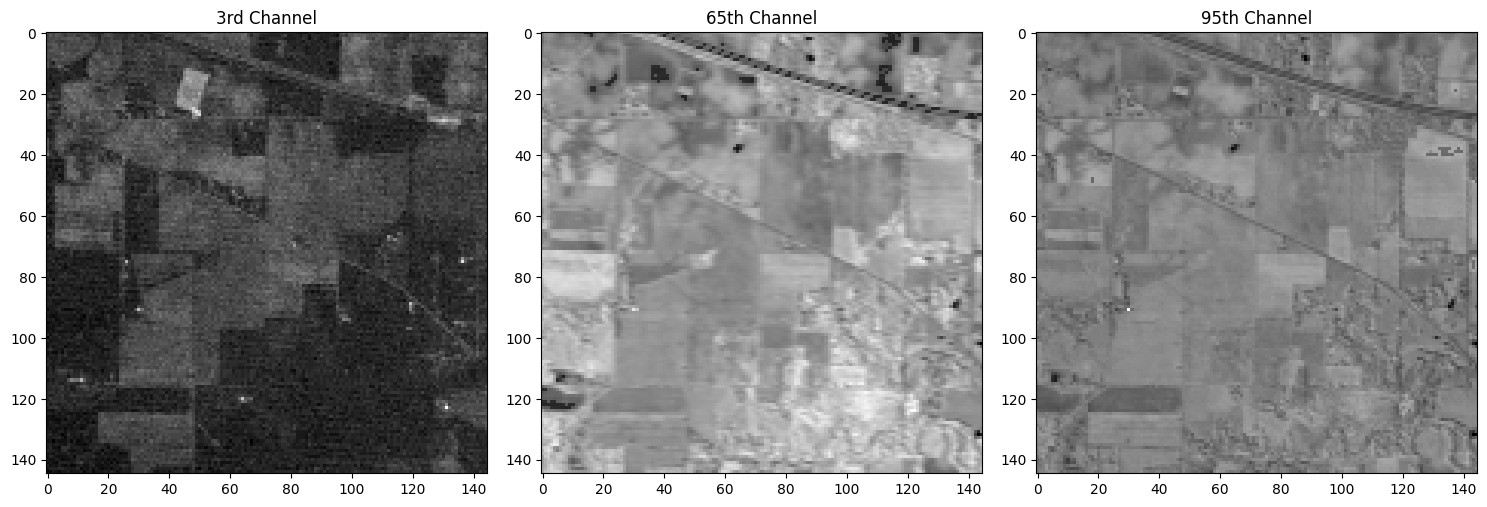

In [131]:
#2b
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_data[:, :, 2], cmap='gray') 
plt.title('3rd Channel')

plt.subplot(1, 3, 2)
plt.imshow(image_data[:, :, 64], cmap='gray')  
plt.title('65th Channel')

plt.subplot(1, 3, 3)
plt.imshow(image_data[:, :, 94], cmap='gray') 
plt.title('95th Channel')

plt.tight_layout()
plt.show()

#each pixel's brightness corresponds to the intensity at that wavelength (channel)

In [132]:
#2c
num_classes = len(np.unique(annotations))
print(f"Number of Different Categories: {num_classes}")


Number of Different Categories: 17


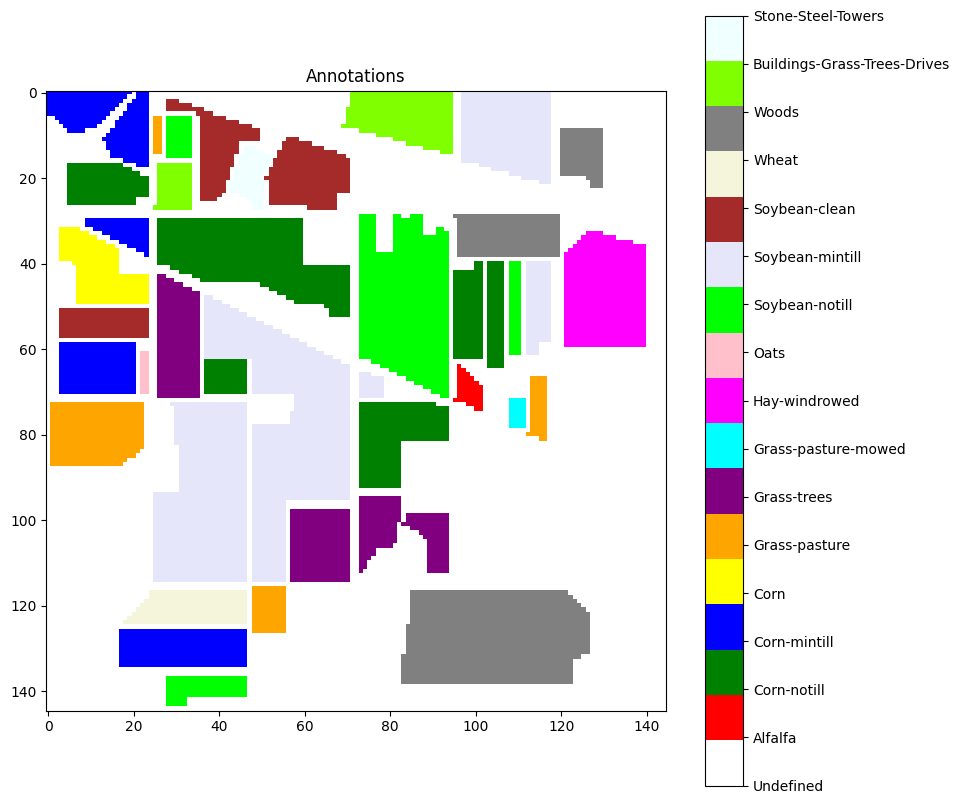

In [133]:
#2d
from matplotlib.colors import ListedColormap

classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

cmap = ListedColormap(['white', 'red', 'green', 'blue', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'pink', 'lime', 'lavender', 'brown', 'beige', 'gray', 'chartreuse', 'azure'])
plt.figure(figsize=(10, 10)) 

plt.imshow(annotations, cmap=cmap)

cbar = plt.colorbar(ticks=range(len(classes)))
cbar.ax.set_yticklabels(classes) 

plt.title('Annotations')

plt.show()


In [134]:
unique, counts = np.unique(annotations, return_counts=True)
pixel_counts = dict(zip(unique, counts))

for class_index, count in pixel_counts.items():
    class_name = classes[class_index]  
    print(f"{class_name}: {count} pixels")


Undefined: 10776 pixels
Alfalfa: 46 pixels
Corn-notill: 1428 pixels
Corn-mintill: 830 pixels
Corn: 237 pixels
Grass-pasture: 483 pixels
Grass-trees: 730 pixels
Grass-pasture-mowed: 28 pixels
Hay-windrowed: 478 pixels
Oats: 20 pixels
Soybean-notill: 972 pixels
Soybean-mintill: 2455 pixels
Soybean-clean: 593 pixels
Wheat: 205 pixels
Woods: 1265 pixels
Buildings-Grass-Trees-Drives: 386 pixels
Stone-Steel-Towers: 93 pixels


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [135]:
annotations_vector = annotations.flatten()

N, K = height * width, num_channels
image_vector = image_data.reshape((N, K))

defined_indices = np.where(annotations_vector != 0)[0]

filtered_image_vector = image_vector[defined_indices]
filtered_annotations_vector = annotations_vector[defined_indices]

print(len(image_vector))
print(len(annotations_vector))
print(len(filtered_image_vector))
print(len(filtered_annotations_vector))

21025
21025
10249
10249


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [136]:
random_pixels = {}

for class_index, class_name in enumerate(classes):
    if class_name != 'Undefined':  
        indices = np.where(filtered_annotations_vector == class_index)[0]
        
        if len(indices) > 0: 
            random_index = np.random.choice(indices)
            random_pixels[class_name] = random_index

for class_name, pixel_index in random_pixels.items():
    print(f"Class {class_name}: Pixel Index {pixel_index}")


Class Alfalfa: Pixel Index 5850
Class Corn-notill: Pixel Index 4627
Class Corn-mintill: Pixel Index 505
Class Corn: Pixel Index 3947
Class Grass-pasture: Pixel Index 5855
Class Grass-trees: Pixel Index 5709
Class Grass-pasture-mowed: Pixel Index 6593
Class Hay-windrowed: Pixel Index 3521
Class Oats: Pixel Index 5460
Class Soybean-notill: Pixel Index 3892
Class Soybean-mintill: Pixel Index 6048
Class Soybean-clean: Pixel Index 4244
Class Wheat: Pixel Index 8916
Class Woods: Pixel Index 9956
Class Buildings-Grass-Trees-Drives: Pixel Index 554
Class Stone-Steel-Towers: Pixel Index 1180


3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

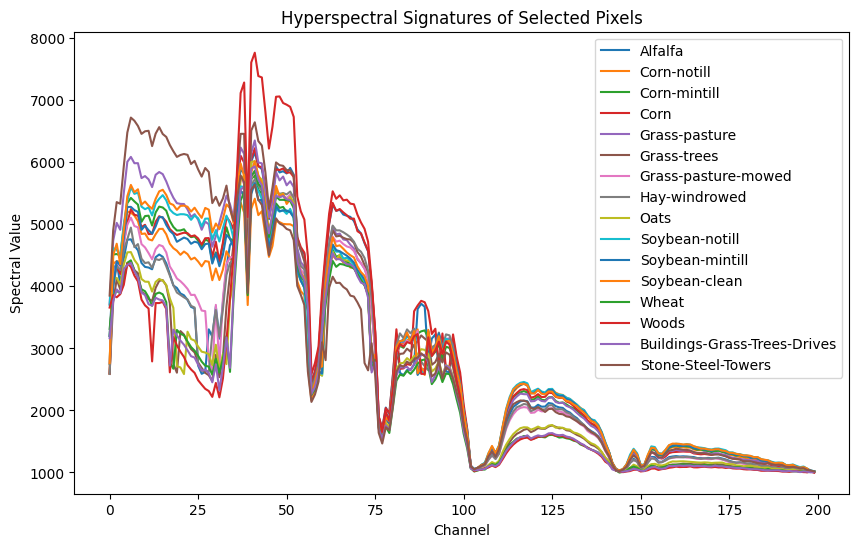

In [137]:
plt.figure(figsize=(10, 6))

for class_name, pixel_index in random_pixels.items():
    spectral_signature = filtered_image_vector[pixel_index]

    plt.plot(spectral_signature, label=class_name)

plt.legend()
plt.xlabel('Channel')
plt.ylabel('Spectral Value')
plt.title('Hyperspectral Signatures of Selected Pixels')

plt.show()


3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

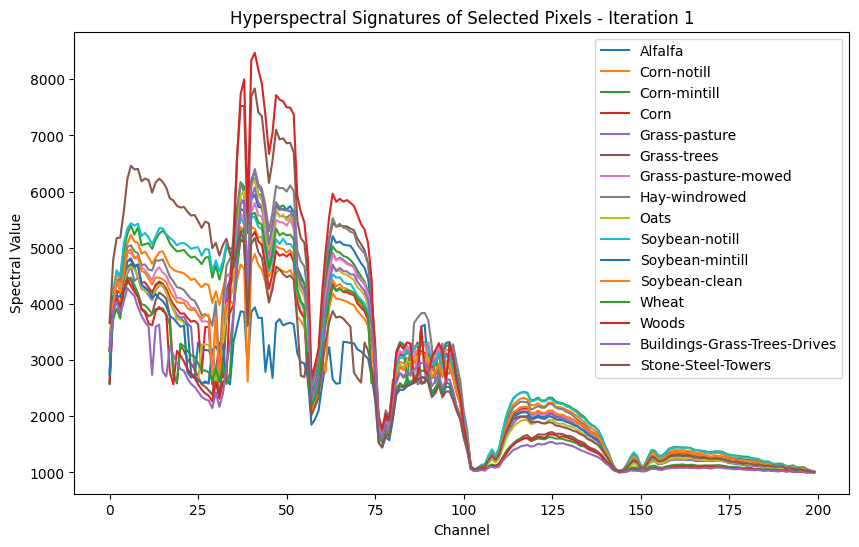

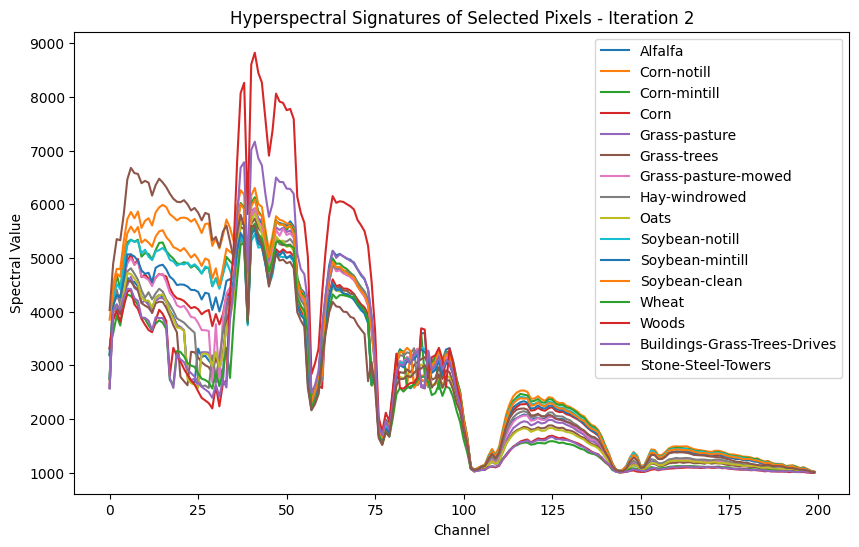

In [138]:
for iteration in range(2):  
    random_pixels = {}

    for class_index, class_name in enumerate(classes):
        if class_name != 'Undefined':
            indices = np.where(filtered_annotations_vector == class_index)[0]
            
            if len(indices) > 0:
                random_index = np.random.choice(indices)
                random_pixels[class_name] = random_index

    plt.figure(figsize=(10, 6))

    for class_name, pixel_index in random_pixels.items():
        spectral_signature = filtered_image_vector[pixel_index]
        plt.plot(spectral_signature, label=class_name)

    plt.legend()
    plt.xlabel('Channel')
    plt.ylabel('Spectral Value')
    plt.title(f'Hyperspectral Signatures of Selected Pixels - Iteration {iteration + 1}')

    plt.show()



3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

1. **Διαχωρισιμότητα μεταξύ των Καλλιεργειών:**
   - Ορισμένες καλλιέργειες μπορεί να έχουν πιο χαρακτηριστικές φασματικές υπογραφές, γεγονός που τις καθιστά πιο εύκολα διαχωρίσιμες μεταξύ τους. Για παράδειγμα, αν οι φασματικές γραμμές για δύο τύπους καλλιεργειών δεν επικαλύπτονται πολύ και έχουν διακριτικές κορυφές και κοιλάδες σε διαφορετικά κανάλια, υποδηλώνει ότι αυτές οι καλλιέργειες μπορούν να διαχωριστούν πιο εύκολα με βάση τις φασματικές τους υπογραφές.
   - Αντίθετα, αν μερικές καλλιέργειες έχουν πολύ παρόμοια φασματικά προφίλ, μπορεί να είναι πιο δύσκολο να διαχωριστούν μόνο με βάση τις φασματικές τους υπογραφές.

2. **Χρησιμότητα των Καναλιών:**
   - Ορισμένα κανάλια όπου πολλαπλές καλλιέργειες έχουν επικαλυπτόμενες φασματικές τιμές προσφέρουν λιγότερη διακριτική ικανότητα. Από την άλλη πλευρά, τα κανάλια όπου οι φασματικές υπογραφές σαφώς διαφοροποιούνται για διάφορες καλλιέργειες είναι πιο χρήσιμα για την ταξινόμηση.

3. **Συνέπεια Μεταξύ Επαναλήψεων:**
   - Συγκρίνοντας τα διαγράμματα από διάφορες επαναλήψεις, μπορούμε να αξιολογήσουμε τη συνέπεια των φασματικών υπογραφών για κάθε κατηγορία. Αν οι φασματικές γραμμές για μια συγκεκριμένη κατηγορία διαφέρουν σημαντικά μεταξύ των επαναλήψεων, αυτό μπορεί να υποδεικνύει μεταβλητότητα εντός της κλάσης ή ζητήματα μεικτών pixels.




3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

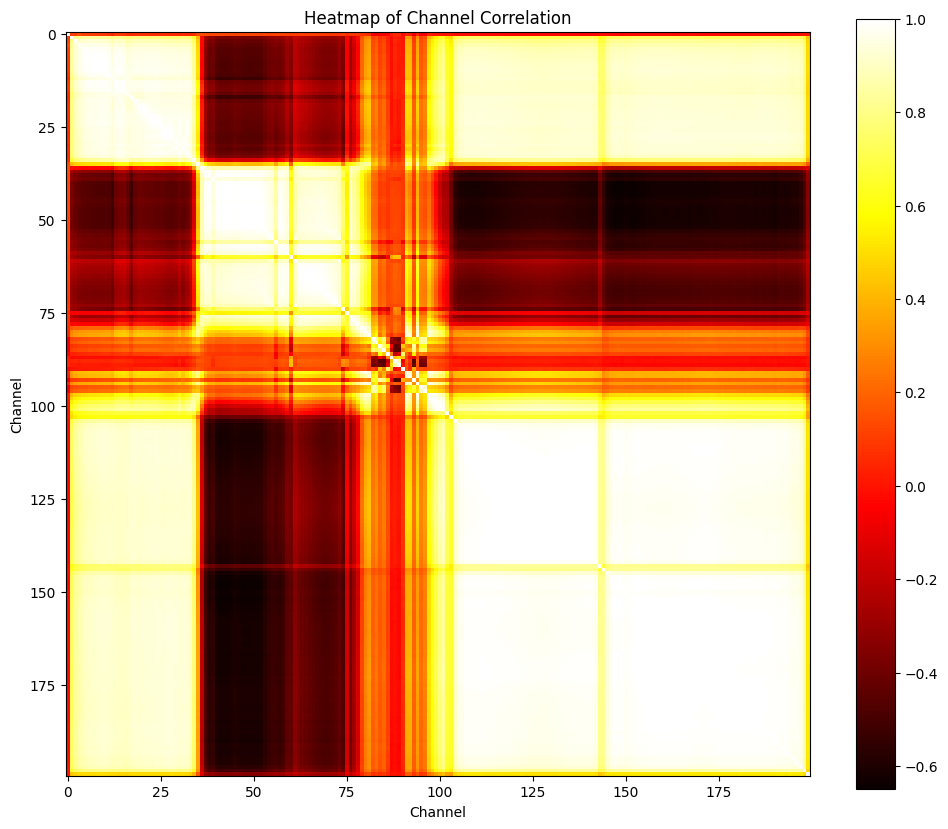

In [139]:
correlation_matrix = np.corrcoef(filtered_image_vector.T)

plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.title('Heatmap of Channel Correlation')
plt.colorbar()
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.show()


### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [140]:
from sklearn.cluster import KMeans

n_clusters = 16

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(filtered_image_vector)

predicted_labels = kmeans.labels_


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [141]:
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2): 
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

In [142]:
from sklearn.metrics import rand_score, silhouette_score, confusion_matrix
rand_score_metric = rand_score(filtered_annotations_vector, predicted_labels)
print(f"Rand Score: {rand_score_metric}")
silhouette_score_metric = silhouette_score(filtered_image_vector, predicted_labels)
print(f"Silhouette Score: {silhouette_score_metric}")

translated_labels = translate_predicted_labels(predicted_labels, filtered_annotations_vector - 1)
cm = confusion_matrix(filtered_annotations_vector - 1, translated_labels)
acc = accuracy(cm)

print(f"Accuracy: {acc}")

Rand Score: 0.8510344376622414


Silhouette Score: 0.28349589322185115
map: 0 --> 2
map: 1 --> 14
map: 2 --> 9
map: 3 --> 13
map: 4 --> 1
map: 5 --> 4
map: 6 --> 0
map: 7 --> 3
map: 8 --> 12
map: 9 --> 15
map: 10 --> 5
map: 11 --> 11
map: 12 --> 10
map: 13 --> 7
map: 14 --> 8
map: 15 --> 6
Accuracy: 0.34744853156405503


### Rand Score:
- **Τι Μετράει:** Το Rand Score αξιολογεί την ομοιότητα μεταξύ δύο clusters αξιολογώντας όλα τα ζευγάρια δειγμάτων και ελέγχοντας αν είναι σωστά clustered μαζί ή χωριστά.
- **Κύριο Χαρακτηριστικό:** Εξετάζει και τις συμφωνίες (σωστά clustered μαζί/χωριστά) και τις διαφωνίες (λανθασμένα clustered) σε όλα τα ζευγάρια.

### Silhouette Score:
- **Τι Μετράει:** Το Silhouette Score αξιολογεί πόσο καλά ταιριάζει κάθε δείγμα δεδομένων μέσα στην ομάδα που έχει ανατεθεί σε σχέση με άλλες ομάδες.
- **Κύριο Χαρακτηριστικό:** Υπολογίζει τη μέση απόσταση κάθε σημείου από τα άλλα σημεία στην ίδια ομάδα και την πιο κοντινή ομάδα στην οποία δεν ανήκει. Χρησιμοποιείται για να καθορίσει τη συνοχή και τον διακριτότητα των ομάδων.

### Accuracy:
- **Τι Μετράει:** Η μετρική accuracy μετρά το ποσοστό των σωστά ταυτοποιημένων ετικετών προς τον συνολικό αριθμό δειγμάτων.
- **Κύριο Χαρακτηριστικό:** Συγκρίνει απευθείας τις προβλεπόμενες ετικέτες με τις πραγματικές ετικέτες για κάθε μεμονωμένο δείγμα.


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

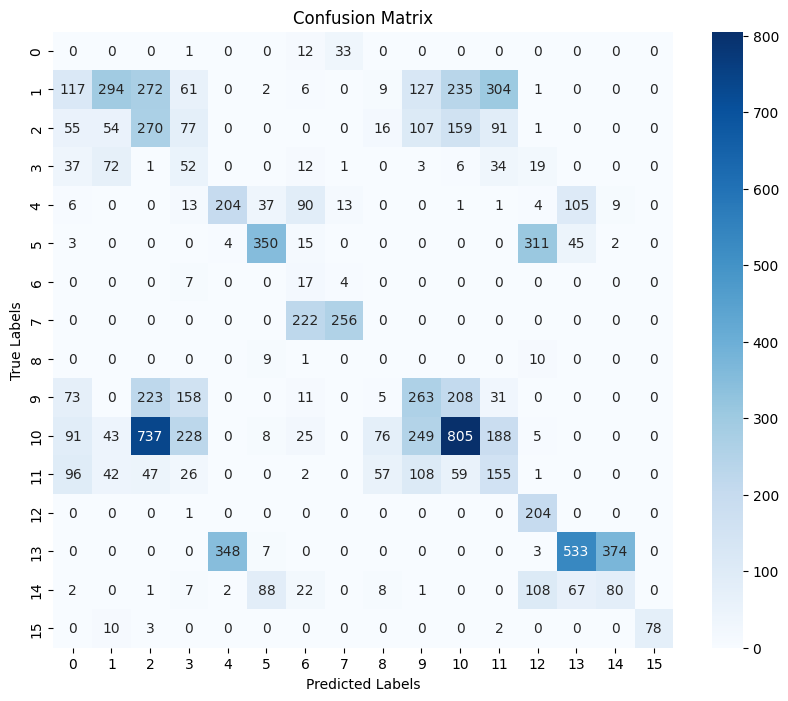

In [143]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

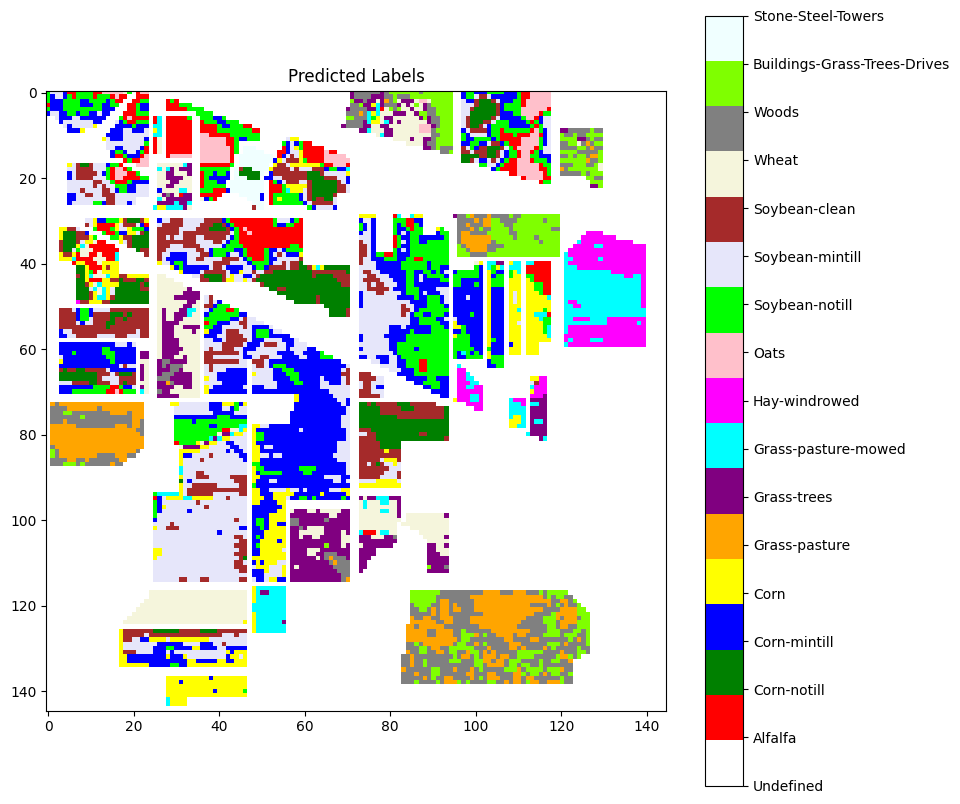

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

predicted_image = np.zeros(height * width)
predicted_image[defined_indices] = translated_labels + 1  

predicted_image = predicted_image.reshape((height, width))

plt.figure(figsize=(10, 10))
plt.imshow(predicted_image, cmap=cmap)

cbar = plt.colorbar(ticks=range(len(classes)))
cbar.ax.set_yticklabels(classes)


plt.title('Predicted Labels')
plt.show()


Η απόκλιση μεταξύ των αποτελεσμάτων του αλγορίθμου k-means και των πραγματικών ετικετών μπορεί να οφείλεται σε αρκετούς παράγοντες σχετιζόμενους με την φύση των δεδομένων αλλά και του αλγορίθμου:

1. **Φασματική Μεταβλητότητα:**
   - Παρόμοιοι τύποι επιφάνειας ενδέχεται να έχουν επικαλυπτόμενες φασματικές υπογραφές, κάτι που δυσκολεύει τον k-means να τις διακρίνει.
   - Η φασματική μεταβλητότητα εντός του ίδιου τύπου επιφάνειας λόγω διαφορετικών συνθηκών (υγρασία, έδαφος, εποχικότητα) μπορεί να οδηγήσει στον διαχωρισμό της ίδιας κλάσης σε διαφορετικές συστάδες.

2. **Χωρικά δεδομένα:**
   - Ο αλγόριθμος K-means clustering βασίζεται κυρίως σε φασματικές πληροφορίες και δεν λαμβάνει υπόψη τη χωρική εγγύτητα των πιχελσ. Αυτό μπορεί να οδηγήσει σε έλλειψη χωρικής συνέχειας, όπου διπλανά pixels της ίδιας κλάσης ανατίθενται σε διαφορετικές συστάδες.

3. **Μικτά Pixels:**
   - Τα Pixels στα άκρα διαφορετικών τύπων επιφάνειας μπορεί να περιέχουν μικτές φασματικές πληροφορίες που δεν αντιπροσωπεύουν καλά μία μόνο κλάση, οδηγώντας σε λανθασμένες αναθέσεις.

4. **Θόρυβος:**
   - Ο θόρυβος στα δεδομένα, όπως σφάλματα αισθητήρων ή ατμοσφαιρικές επιδράσεις, μπορεί να παραμορφώσει τις φασματικές υπογραφές και να οδηγήσει σε λανθασμένες ταξινομήσεις.
   
5. **Περιορισμοί του Αλγορίθμου:**
   - Ο αλγόριθμος K-means clustering υποθέτει ότι κάθε κλάση είναι εξίσου πιθανή, αλλά στην πραγματικότητα, μερικοί τύποι επιφάνειας μπορεί να είναι πιο συχνοί από άλλους.
   - Ο αλγόριθμος δεν λειτουργεί καλά με μη κυρτές συστάδες ή συστάδες διαφορετικών πυκνοτήτων.




### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [145]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)

reduced_data = pca.fit_transform(filtered_image_vector)



5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [146]:
# The explained_variance_ratio_ attribute of PCA contains the variance explained by each of the selected components
variance_ratios = pca.explained_variance_ratio_

# Calculate the total variance captured by the first three components
total_variance = sum(variance_ratios) * 100  

print("Variance captured by the first component: {:.2f}%".format(variance_ratios[0] * 100))
print("Variance captured by the second component: {:.2f}%".format(variance_ratios[1] * 100))
print("Variance captured by the third component: {:.2f}%".format(variance_ratios[2] * 100))
print("Total variance captured by the first 3 components: {:.2f}%".format(total_variance))



Variance captured by the first component: 66.45%
Variance captured by the second component: 26.54%
Variance captured by the third component: 1.21%
Total variance captured by the first 3 components: 94.20%


### PCA:

Η Ανάλυση Κύριων Συνιστωσών (Principal Component Analysis) είναι μια στατιστική διαδικασία που χρησιμοποιεί μια ορθογώνια μετατροπή για να μετατρέψει μια σειρά πιθανώς συσχετισμένων μεταβλητών (χαρακτηριστικών) σε ένα σύνολο τιμών γραμμικά ασυσχέτιστων μεταβλητών που ονομάζονται κύριες συνιστώσες. Ο αριθμός των κύριων συνιστωσών είναι μικρότερος ή ίσος με τον αριθμό των αρχικών μεταβλητών.

Οι βασικές ιδέες πίσω από την PCA περιλαμβάνουν:

1. **Μεγιστοποίηση της Διασποράς:**
   Η PCA στοχεύει στην εύρεση των κατευθύνσεων (κύριες συνιστώσες) κατά τις οποίες η διασπορά στα δεδομένα είναι μέγιστη. Η πρώτη κύρια συνιστώσα απορροφά την περισσότερη διασπορά, η δεύτερη απορροφά τη δεύτερη μεγαλύτερη, και ούτω καθεξής.

2. **Μείωση της Διάστασης:**
   Επιλέγοντας ένα υποσύνολο κύριων συνιστωσών (π.χ., τις τρεις πρώτες), η PCA μειώνει τη διάσταση των δεδομένων. Αυτό μπορεί να απλοποιήσει το σετ δεδομένων, να επιταχύνει τις επόμενες αναλύσεις και συχνά να μειώσει τον θόρυβο.

3. **Εξαγωγή Χαρακτηριστικών::**
   Η PCA θεωρείται επίσης μια τεχνική εξαγωγής χαρακτηριστικών, όπου νέα χαρακτηριστικά (κύριες συνιστώσες) δημιουργούνται από τα αρχικά. Αυτά τα νέα χαρακτηριστικά είναι γραμμικοί συνδυασμοί των αρχικών μεταβλητών και είναι ασυσχέτιστα μεταξύ τους.

4. **Συμπίεση Δεδομένων:**
   Επειδή η PCA mας επιτρέπει να αναπαραστήσoyme τα δεδομένα με λιγότερες διαστάσεις διατηρώντας όσο το δυνατόν περισσότερη διασπορά, συμπιέζει αποτελεσματικά τις πληροφορίες που περιέχονται στα δεδομένα.

Στο πλαίσιο της υπερφασματικής απεικόνισης, η PCA χρησιμοποιείται συχνά επειδή τέτοια δεδομένα έχουν συνήθως πολύ υψηλή φασματική διαστατικότητα, με εκατοντάδες μπάντες. Μειώνοντας τη διαστατικότητα, μπορεί κανείς να εστιάσει στα πιο χρήσιμα φασματικά χαρακτηριστικά, πράγμα που μπορεί να είναι ωφέλιμο για την οπτικοποίηση, περαιτέρω ανάλυση ή εργασίες επεξεργασίας όπως η ταξινόμηση ή η συσταδοποίηση.

### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [147]:
kmeans_reduced = KMeans(n_clusters=16, random_state=0).fit(reduced_data)

predicted_labels_reduced = kmeans_reduced.labels_

rand_score_reduced = rand_score(filtered_annotations_vector, predicted_labels_reduced)
print(f"Rand Score for reduced data: {rand_score_reduced:.2f}")

silhouette_score_reduced = silhouette_score(reduced_data, predicted_labels_reduced)
print(f"Silhouette Score for reduced data: {silhouette_score_reduced:.2f}")

translated_labels_reduced = translate_predicted_labels(predicted_labels_reduced, filtered_annotations_vector - 1)
cm_reduced = confusion_matrix(filtered_annotations_vector - 1, translated_labels_reduced)
acc_reduced = accuracy(cm_reduced)
print(f"Accuracy for reduced data: {acc_reduced:.2f}")




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Rand Score for reduced data: 0.85
Silhouette Score for reduced data: 0.37
map: 0 --> 6
map: 1 --> 14
map: 2 --> 0
map: 3 --> 8
map: 4 --> 3
map: 5 --> 4
map: 6 --> 7
map: 7 --> 5
map: 8 --> 9
map: 9 --> 1
map: 10 --> 11
map: 11 --> 12
map: 12 --> 13
map: 13 --> 2
map: 14 --> 10
map: 15 --> 15
Accuracy for reduced data: 0.35


6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 10
map: 1 --> 14
map: 2 --> 7
map: 3 --> 12
map: 4 --> 11
map: 5 --> 13
map: 6 --> 1
map: 7 --> 15
map: 8 --> 3
map: 9 --> 2
map: 10 --> 6
map: 11 --> 4
map: 12 --> 0
map: 13 --> 5
map: 14 --> 9
map: 15 --> 8


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 14
map: 1 --> 6
map: 2 --> 10
map: 3 --> 4
map: 4 --> 11
map: 5 --> 7
map: 6 --> 2
map: 7 --> 13
map: 8 --> 12
map: 9 --> 0
map: 10 --> 1
map: 11 --> 8
map: 12 --> 9
map: 13 --> 5
map: 14 --> 15
map: 15 --> 3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 6
map: 1 --> 14
map: 2 --> 0
map: 3 --> 8
map: 4 --> 3
map: 5 --> 4
map: 6 --> 7
map: 7 --> 5
map: 8 --> 9
map: 9 --> 1
map: 10 --> 11
map: 11 --> 12
map: 12 --> 13
map: 13 --> 2
map: 14 --> 10
map: 15 --> 15


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 5
map: 1 --> 2
map: 2 --> 10
map: 3 --> 0
map: 4 --> 4
map: 5 --> 6
map: 6 --> 1
map: 7 --> 14
map: 8 --> 9
map: 9 --> 8
map: 10 --> 13
map: 11 --> 7
map: 12 --> 15
map: 13 --> 3
map: 14 --> 11
map: 15 --> 12


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 3
map: 1 --> 5
map: 2 --> 10
map: 3 --> 6
map: 4 --> 4
map: 5 --> 1
map: 6 --> 12
map: 7 --> 9
map: 8 --> 0
map: 9 --> 13
map: 10 --> 11
map: 11 --> 14
map: 12 --> 7
map: 13 --> 15
map: 14 --> 8
map: 15 --> 2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 2
map: 1 --> 13
map: 2 --> 11
map: 3 --> 7
map: 4 --> 6
map: 5 --> 4
map: 6 --> 10
map: 7 --> 0
map: 8 --> 8
map: 9 --> 5
map: 10 --> 9
map: 11 --> 1
map: 12 --> 15
map: 13 --> 3
map: 14 --> 12
map: 15 --> 14


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 3
map: 1 --> 14
map: 2 --> 11
map: 3 --> 0
map: 4 --> 10
map: 5 --> 4
map: 6 --> 7
map: 7 --> 8
map: 8 --> 9
map: 9 --> 5
map: 10 --> 13
map: 11 --> 1
map: 12 --> 15
map: 13 --> 6
map: 14 --> 2
map: 15 --> 12


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 11
map: 1 --> 13
map: 2 --> 9
map: 3 --> 12
map: 4 --> 10
map: 5 --> 2
map: 6 --> 1
map: 7 --> 4
map: 8 --> 6
map: 9 --> 0
map: 10 --> 14
map: 11 --> 8
map: 12 --> 3
map: 13 --> 15
map: 14 --> 5
map: 15 --> 7


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 2
map: 1 --> 14
map: 2 --> 7
map: 3 --> 8
map: 4 --> 4
map: 5 --> 13
map: 6 --> 11
map: 7 --> 12
map: 8 --> 9
map: 9 --> 0
map: 10 --> 15
map: 11 --> 6
map: 12 --> 5
map: 13 --> 3
map: 14 --> 1
map: 15 --> 10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 2
map: 1 --> 5
map: 2 --> 1
map: 3 --> 0
map: 4 --> 4
map: 5 --> 6
map: 6 --> 11
map: 7 --> 14
map: 8 --> 9
map: 9 --> 3
map: 10 --> 12
map: 11 --> 10
map: 12 --> 15
map: 13 --> 8
map: 14 --> 13
map: 15 --> 7


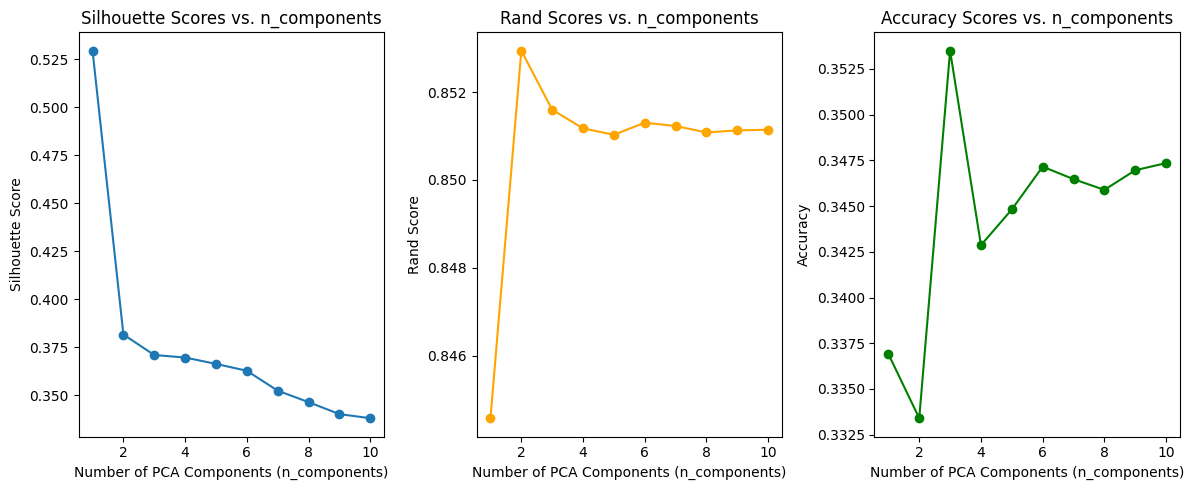

In [148]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, rand_score
import matplotlib.pyplot as plt


silhouette_scores = []
rand_scores = []
accuracy_scores = []

for n in range(1, 11):
    pca = PCA(n_components=n)
    reduced_data = pca.fit_transform(filtered_image_vector)

    kmeans = KMeans(n_clusters=16, random_state=0).fit(reduced_data)
    predicted_labels = kmeans.labels_

    silhouette_avg = silhouette_score(reduced_data, predicted_labels)
    silhouette_scores.append(silhouette_avg)

    rand_index = rand_score(filtered_annotations_vector, predicted_labels)
    rand_scores.append(rand_index)

    translated_labels = translate_predicted_labels(predicted_labels, filtered_annotations_vector - 1)
    cm = confusion_matrix(filtered_annotations_vector - 1, translated_labels)
    acc = accuracy(cm)
    accuracy_scores.append(acc)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores vs. n_components')
plt.xlabel('Number of PCA Components (n_components)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(range(1, 11), rand_scores, marker='o', color='orange')
plt.title('Rand Scores vs. n_components')
plt.xlabel('Number of PCA Components (n_components)')
plt.ylabel('Rand Score')

plt.subplot(1, 3, 3)
plt.plot(range(1, 11), accuracy_scores, marker='o', color='green')
plt.title('Accuracy Scores vs. n_components')
plt.xlabel('Number of PCA Components (n_components)')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


1. **Silhouette Scores vs. n_components:**
   - Το γράφημα δείχνει μια γενική πτωτική τάση στα σκορ silhouette καθώς αυξάνεται ο αριθμός των συνιστωσών PCA. Το υψηλότερο σκορ silhouette εμφανίζεται στο n_components=1, που υποδηλώνει ότι όταν τα δεδομένα προβάλλονται σε μία διάσταση, οι συστάδες είναι πιο διακριτές μεταξύ τους. Καθώς προστίθενται περισσότερες συνιστώσες, η διακριτότητα μεταξύ των συστάδων μειώνεται.

2. **Rand Scores vs. n_components:**
   - Το γράφημα του σκορ Rand δείχνει μια απότομη πτώση από n_components=2 σε n_components=3, και στη συνέχεια σταθεροποιείται. Αυτό μπορεί να υποδηλώνει ότι η διδιάστατη προβολή κατέγραψε μια σημαντική δομή των δεδομένων που συμφωνεί καλά με τις αληθινές ετικέτες. Η σταθεροποίηση υποδεικνύει ότι η προσθήκη περισσότερων συνιστωσών δεν αλλάζει σημαντικά τη συμφωνία μεταξύ των συστάδων k-means και των αληθινών ετικετών.

3. **Accuracy Scores vs. n_components:**
   - Το γράφημα της ακρίβειας είναι πιο μεταβλητό, με μια κορύφωση στο n_components=3. Αυτή η κορύφωση μπορεί να καταγράφει ένα ιδανικό σημείο όπου η μειωμένη διαστατικότητα διατηρεί ακόμη αρκετή δομή για να συμφωνεί καλά με τις αληθινές ετικέτες μετά τη συσταδοποίηση. Οι επόμενες μεταβολές μπορεί να οφείλονται στον υψηλότερο διαστατικό χώρο που καταγράφει περισσότερο θόρυβο ή πολύπλοκα μοτίβα που δεν συμφωνούν απαραίτητα με τις αληθινές ετικέτες.

### Συμπεράσματα και Παρατηρήσεις:

- **Ιδανικός Αριθμός Συνιστωσών:**
  - Το silhouette score υποδεικνύει ότι μια αναπαράσταση χαμηλότερης διάστασης μπορεί να είναι πιο αποτελεσματική για τη συσταδοποίηση σε αυτή την περίπτωση. Ωστόσο, είναι σημαντικό να ισορροπήσουμε αυτό με την ανάγκη για αρκετές συνιστώσες προκειμένου να αποτυπωθεί η σχετική διασπορά στα δεδομένα.
  
- **Σταθερότητα Rand Score:**
  - Η σχετική σταθερότητα του σκορ Rand σε διάφορους αριθμούς συνιστωσών υποδεικνύει ότι οι θεμελιώδεις ομαδοποιήσεις στα δεδομένα δεν αλλάζουν δραστικά πέραν των δύο συνιστωσών. Υποδηλώνει ότι η πρόσθετη διασπορά που καταγράφεται από περισσότερες συνιστώσες μπορεί να μην είναι τόσο σχετική για την συσταδοποίηση.

- **Ακρίβεια:**
  - Η διακύμανση των accuracy scores υποδεικνύει ότι αυτός ο δείκτης μπορεί να είναι ευαίσθητος στον συγκεκριμένο τρόπο που η PCA αντιστοιχίζει τα reduced δεδομένα με τις πραγματικές ετικέτες. Επειδή η ακρίβεια εξαρτάται από τη σωστή αντιστοίχιση των ετικετών, μπορεί να μεταβάλλεται καθώς η μείωση της διαστατικότητας αποτυπώνει διαφορετικές πτυχές των δεδομένων.

- **Συνιστώσες PCA και Συσταδοποίηση:**
  - Αυτά τα αποτελέσματα επισημαίνουν το δίλημμα στην επιλογή του αριθμού των συνιστωσών PCA για συσταδοποίηση. Πολύ λίγες συνιστώσες μπορεί να απλοποιήσουν υπερβολικά τα δεδομένα, ενώ πολύ πολλές μπορεί να εισάγουν θόρυβο και πολυπλοκότητα που δεν συμβάλλουν απαραίτητα σε καλύτερη συσταδοποίηση.
